No notebook anterior, nós aprendemos intuitivamente como o perceptron aprende. De maneira geral, nós vamos atualizando os pesos e o bias sempre buscando diminuir uma função de custo. Nesse notebook, nós vamos ver como esse aprendizado realmente acontence, tanto na teoria quanto na prática. Também utilizaremos o Perceptron para resolver problemas de classificação e regressão.

__Objetivos__:

- Implementar o perceptron e seu modelo de aprendizado em Python puro e Numpy
- Utilizar o perceptron para regressão e classificação

# Sumário

[Introdução](#Introdução)
- [Regra de Aprendizado do Perceptron](#Regra-de-Aprendizado-do-Perceptron)
- [Pseudo-algoritmo do Perceptron](#Pseudo-algoritmo-do-Perceptron)

[Classificação](#Classificação)
- [Porta AND/OR](#Porta-AND/OR)
- [Exercício de Classificação](#Exerc%C3%ADcio-de-Classificação)

[Regressão](#Regressão)
- [Exercício de Regressão](#Exerc%C3%ADcio-de-Regressão)

[Referências](#Referências)

# Imports e Configurações

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from random import random
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets.samples_generator import make_blobs

%matplotlib inline

# Introdução

O tipo mais básico de Rede Neural Artificial é formada por apenas um neurônio, o __Perceptron__. Inicialmente, o Perceptron foi projetado para ser um __classificador binário linear__ responsável por mapear uma ou mais entradas em uma saída desejada. Porém, também podemos utilizá-lo para resolver problemas de __regressão linear__. Ele foi projetado em 1957 por Frank Rosenblatt.

O perceptron é formado por:

<img src='images/perceptron.png' width='350'>

- __entradas__ $x_1,...,x_D$: representam os atributos dos seus dados com dimensionalidade $D$. O Perceptron aceita qualquer tamanho de entrada, porém a saída é sempre apenas um valor.
- __junção aditiva__ $\sum$: também chamada de _função agregadora_, nada mais é que a soma ponderada das entradas com os __pesos__ ($w_1,...,w_D)$. Em geral, o resultado é somado com um __bias__ $b$, responsável por deslocar o resultado do somatório. A junção aditiva é descrita pela seguinte fórmula:

$$\sum_i^D{x_iw_i} + b$$

- __função de ativação__ $f$: utilizada para mapear o resultado da junção aditiva em uma saída esperada. Mais detalhes abaixo.

Logo, o Perceptron é representado pela seguinte fórmula matemática:

$$\widehat{y}_i = f(\sum_i^D{x_iw_i} + b)$$

Onde:

- $D$: representa a dimensionalidade das amostras, ou seja, a quantidade de atributos de cada amostra.
- $x_i$: representam os atributos de uma amostra que servem de entrada para o Perceptron.
- $w_i$: representam os __pesos sinápticos__ que ponderam as entradas.
- $b$: representa o __bias__, responsável por deslocar a fronteira de decisão além da origem e não depende de nenhum valor de entrada. Repare que o bias encontra-se fora do somatório.
- $f$: __função de ativação__. Quando a função de ativação é linear, ou seja, nenhuma transformação é aplicada no resultado da junção aditiva, o Perceptron atua como um __Regressor Linear__. Se precisamos efetuar uma __Classificação binária__, devemos utilizar a função _step_ (também conhecida como _função degrau_) para mapear a saída em um valor discreto (0 ou 1):

$$f = \begin{cases}1 & se \ wx+b > 0\\0 & caso \ contr\acute ario\end{cases}$$

- $\widehat{y}$: representa a saída do Perceptron (o valor predito).

__Observações importantes__:

- O Perceptron não faz __Classificação Multiclasse__.
- __A atualização dos pesos é *online*, ou seja, efetuada amostra a amostra__ utilizando uma fórmula pré-definida que veremos na seção a seguir.

## Regra de Aprendizado do Perceptron

O Perceptron tem sua própria forma de aprendizado conforme definido no seu artigo original. Na verdade, a fórmula para atualização dos pesos e bias é bem simples:

$$w_i = w_i + \lambda(y_i - \widehat{y}_i)x_i$$
<br>
$$b_i = b_i + \lambda(y_i - \widehat{y}_i)$$

Onde $\lambda$ é a __taxa de aprendizagem__ (___learning rate___).

Repare que $y_i - \widehat{y}_i$ significa calcular a diferença entre o valor esperado ($y_i$) e o valor predito ($\widehat{y}_i$). Supondo que estamos fazendo __classificação binária__ de uma amostra $(x_i, y_i)$. Nesse caso, teremos duas possibilidades:
- __O valor esperado é $y_i = \widehat{y}_i$__, ou seja, a saída do Perceptron (após a função de ativação _step_) é __igual__ a saída esperada. Nesse caso, __a diferença $y_i - \widehat{y}_i = 0$ e não haverá atualização de pesos__.
- __O valor esperado é $y_i \neq \widehat{y}_i$__, ou seja, a saída do Perceptron (após a função de ativação _step_) é __diferente__ da saída esperada. Nesse caso, __a atualização dos pesos será dada pela diferença $y_i - \widehat{y}_i$__. Repare que:
    - quando essa diferença é __negativa__ (ou seja, $y_i = 0$ e $\widehat{y}_i = 1$), __os pesos tendem a diminuir__.
    - quando essa diferença é __positiva__ (ou seja, $y_i = 1$ e $\widehat{y}_i = 0$), __os pesos tendem a aumentar__.

## Pseudo-algoritmo do Perceptron

1. Inicialize os pesos $w$ e o bias $b$
2. Para cada amostra $(x_n, y_n)$ do nosso banco:
    1. Calcule $\widehat{y} = f(\sum_i^D{x_iw_i} + b)$, onde $f$ é a __função _step_ para classificação__ e __linear no caso da regressão__
    2. Calcule o $erro = y_n - \widehat{y}$
    3. Atualize os pesos $w_i = w_i + \lambda*erro*x_i$
    4. Atualize o bias $b_i = b_i + \lambda*erro$
3. Repita o passo 2 por N vezes ou até que alguma medida de custo para o $erro$ seja menor que um valor pré-determinado.
    
Repare, como dito lá em cima, que __a atualização dos pesos e bias é feito a cada amostra__, e não somente após ver todas as amostras do banco.

# Classificação

## Porta AND/OR

In [40]:
x = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
#y = np.array([0, 1, 1, 1]) # porta OR
y = np.array([0, 0, 0, 1]).T # porta AND

print(x.shape, y.shape)

(4, 2) (4,)


### Python

In [3]:
D = x.shape[1]
w = [2*random()-1 for i in range(D)]
b = 2*random()-1
learning_rate = 1e-2

for step in range(101):
    cost = 0
    for x_n, y_n in zip(x,y):
        y_pred = sum([x_i*w_i for x_i, w_i in zip(x_n, w)])+b
        y_pred = 1 if y_pred > 0 else 0
        error = y_n - y_pred
        w = [w_i + learning_rate*error*x_i for x_i, w_i in zip(x_n, w)]
        b = b + learning_rate*error
        cost+=error**2
    if step % 10 == 0:
        print('step {0}:{1}'.format(step, cost))
        
print('w: ', w)
print('b: ', b)
print('y_pred: {0}'.format(np.dot(x, np.array(w)+b)))

step 0:2
step 10:2
step 20:1
step 30:1
step 40:0
step 50:0
step 60:0
step 70:0
step 80:0
step 90:0
step 100:0
w:  [0.5022114840278247, 0.6787186504262361]
b:  -0.6973934105213784
y_pred: [ 0.         -0.01867476 -0.19518193 -0.21385669]


### Numpy

In [43]:
D = x.shape[1]
w = 2*np.random.random(size=D)-1
b = 2*np.random.random()-1
learning_rate = 1e-2

for step in range(101):
    cost = 0
    for x_n, y_n in zip(x,y):
        y_pred = np.dot(x_n, w) + b
        y_pred = np.where(y_pred > 0, 1, 0)
        error = y_n - y_pred
        w = w + learning_rate*np.dot(error, x_n)
        b = b + learning_rate*error
        cost+=error**2
    if step % 10 == 0:
        print('step {0}:{1}'.format(step, cost))

print('w: ', w)
print('b: ', b)
print('y_pred: {0}'.format(np.dot(x, np.array(w)+b)))

step 0:3
step 10:2
step 20:2
step 30:3
step 40:3
step 50:2
step 60:1
step 70:2
step 80:2
step 90:1
step 100:2
w:  [ 0.33162731 -0.10617817]
b:  -0.20632034454972897
y_pred: [ 0.         -0.31249852  0.12530697 -0.18719155]


## Exercício de Classificação

(100, 2) (100,)


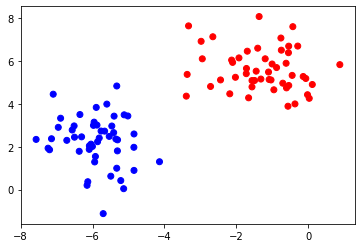

In [44]:
x, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=1234)

print(x.shape, y.shape)
plt.scatter(x[:,0], x[:,1], c=y.ravel(), cmap='bwr')

In [45]:
def plot_linear_classifier(x, y, w, b):
    x1_min, x1_max = x[:,0].min(), x[:,0].max()
    x2_min, x2_max = x[:,1].min(), x[:,1].max()

    x1, x2 = np.meshgrid(np.linspace(x1_min-1, x1_max+1,100), np.linspace(x2_min-1, x2_max+1, 100))
    x_mesh = np.array([x1.ravel(), x2.ravel()]).T

    plt.scatter(x[:,0], x[:,1], c=y.ravel(), cmap='bwr')

    y_mesh = np.dot(x_mesh, np.array(w).reshape(1, -1).T) + b
    y_mesh = np.where(y_mesh <= 0, 0, 1)

    plt.contourf(x1, x2, y_mesh.reshape(x1.shape), cmap='bwr', alpha=0.5)
    plt.xlim(x1_min-1, x1_max+1)
    plt.ylim(x2_min-1, x2_max+1)

### Python

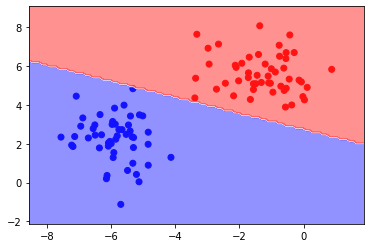

In [50]:
D = x.shape[1]
w = [2*random()-1 for i in range(D)]
b = 2*random()-1
learning_rate = 1e-2

for step in range(101):
    for x_n, y_n in zip(x,y):
        y_pred = sum([x_i*w_i for x_i, w_i in zip(x_n, w)])+b
        y_pred = 1 if y_pred >0 else 0
        error = y_n - y_pred
        w = [w_i + learning_rate*error*x_i for x_i, w_i in zip(x_n, w)]
        b = b + learning_rate*error
plot_linear_classifier(x,y,w,b)

### Numpy

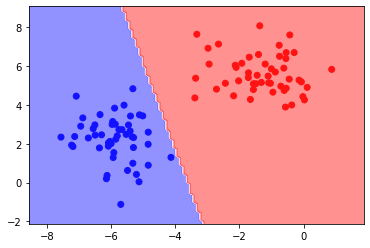

In [13]:
D = x.shape[1]
w = 2*np.random.random(size=D)-1
b = 2*np.random.random()-1
learning_rate=1e-2

for step in range(101):
    for x_n, y_n in zip(x,y):
        y_pred = np.dot(x_n, w)+b
        y_pred = np.where(y_pred>0, 1, 0)
        error = y_n-y_pred
        w = w + learning_rate*np.dot(error, x_n)
        b = b + learning_rate*error
plot_linear_classifier(x,y,w,b)

# Regressão 

Para transformar o Perceptron em um __regressor linear__, só o que temos de fazer é __remover a função de ativação _step___, transformando-a em uma função de ativação linear.

Apesar dessa modificação, __a fórmula de atualização dos pesos não sofre nenhuma alteração__. 

Vamos, então, implementar nosso perceptron para classificação em Python, Numpy, Keras e TensorFlow:

In [51]:
df = pd.read_csv('data/medidas.csv')
print(df.shape)
df.head(10)

(100, 2)


,Altura,Peso
0,187,109.72
1,177,91.09
2,180,88.93
3,177,89.39
4,177,92.02
5,183,94.70
6,178,83.57
7,177,85.19
8,183,92.96
9,188,108.21


Text(0, 0.5, 'Peso')

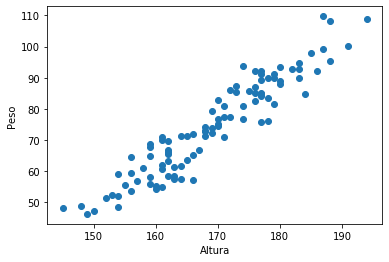

In [52]:
x = df.Altura.values
y = df.Peso.values

plt.figure()
plt.scatter(x, y)
plt.xlabel('Altura')
plt.ylabel('Peso')

In [53]:
print(x.shape, y.shape)

(100,) (100,)


In [54]:
x = x.reshape(-1, 1)

print(x.shape, y.shape)

(100, 1) (100,)


### Python

__Exercício__: tentar estimar as learning_rates de **w** e __b__. Elas são diferentes por que nossos dados não estão na mesma escala!

In [19]:
D = x.shape[1]
w = [2*random() - 1 for i in range(D)]
b = 2*random() - 1

for step in range(10001):
    cost = 0
    for x_n, y_n in zip(x, y):
        y_pred = sum([x_i*w_i for x_i, w_i in zip(x_n, w)]) + b
        error = y_n - y_pred
        w = [w_i + 1e-7*error*x_i for x_i, w_i in zip(x_n, w)]
        b = b + 1e-2*error
        cost += error**2

    if step%1000 == 0:
        print('step {0}: {1}'.format(step, cost))

print('w: ', w)
print('b: ', b)

step 0: 1692836.663531613
step 1000: 9669.935874756944
step 2000: 3852.6513832796945
step 3000: 2836.204266220214
step 4000: 2660.557964294953
step 5000: 2631.0329445492166
step 6000: 2626.4238152609414
step 7000: 2625.859847765158
step 8000: 2625.864481770061
step 9000: 2625.90891980604
step 10000: 2625.935051169572
w:  [1.3696674674454985]
b:  -157.85935159760865


### Numpy 

In [55]:
D = x.shape[1]
w = 2*np.random.random(size=D)-1
b = 2*np.random.random()-1 

for step in range(10001):
    cost = 0
    for x_n, y_n in zip(x, y):
        # qual linha devemos remover para transformar o Perceptron num regressor?
        y_pred = np.dot(x_n, w) + b 
        error = y_n - y_pred
        w = w + 1e-7*np.dot(error, x_n)
        b = b + 1e-2*error
        cost += error**2
    
    if step%1000 == 0:
        print('step {0}: {1}'.format(step, cost))
    
print('w: ', w)
print('b: ', b)

step 0: 59091.26095244147
step 1000: 3726.9038860692162
step 2000: 2814.361016912009
step 3000: 2656.8376907024553
step 4000: 2630.4308251855878
step 5000: 2626.3400337491385
step 6000: 2625.854431972927
step 7000: 2625.8674468043528
step 8000: 2625.9110864441705
step 9000: 2625.9361228204743
step 10000: 2625.9478131809806
w:  [1.3698611]
b:  -157.89169579495794


### Numpy com Pré-processamento

In [56]:
minmax = MinMaxScaler(feature_range=(-1,1))
x = minmax.fit_transform(x.astype(np.float64))

print(x.min(), x.max())

-1.0 0.9999999999999991


In [58]:
reg = LinearRegression()
reg.fit(x,y)

print('w: ', reg.coef_)
print('b: ', reg.intercept_)

w:  [33.60164767]
b:  74.99636286981102


In [60]:
D = x.shape[1]
w = 2*np.random.random(size=D)-1
b = 2*np.random.random()-1 

learning_rate = 1e-2 # <- tente estimar a learning_rate

for step in range(1001):
    cost = 0
    for x_n, y_n in zip(x, y):
        y_pred = np.dot(x_n, w) + b 
        error = y_n - y_pred
        w = w + learning_rate*np.dot(error, x_n)
        b = b + learning_rate*error
        cost += error**2
    
    if step%100 == 0:
        print('step {0}: {1}'.format(step, cost))
    
print('w: ', w)
print('b: ', b)

step 0: 269752.6880689386
step 100: 2629.024093205109
step 200: 2629.024092905569
step 300: 2629.024092905569
step 400: 2629.024092905569
step 500: 2629.024092905569
step 600: 2629.024092905569
step 700: 2629.024092905569
step 800: 2629.024092905569
step 900: 2629.024092905569
step 1000: 2629.024092905569
w:  [33.54130144]
b:  74.44004424754145


## Exercício de Regressão

In [61]:
df = pd.read_csv('data/notas.csv')

print(df.shape)
df.head(10)

(25, 4)


,prova1,prova2,prova3,final
0,73,80,75,152
1,93,88,93,185
2,89,91,90,180
3,96,98,100,196
4,73,66,70,142
5,53,46,55,101
6,69,74,77,149
7,47,56,60,115
8,87,79,90,175
9,79,70,88,164


Text(0, 0.5, 'Final')

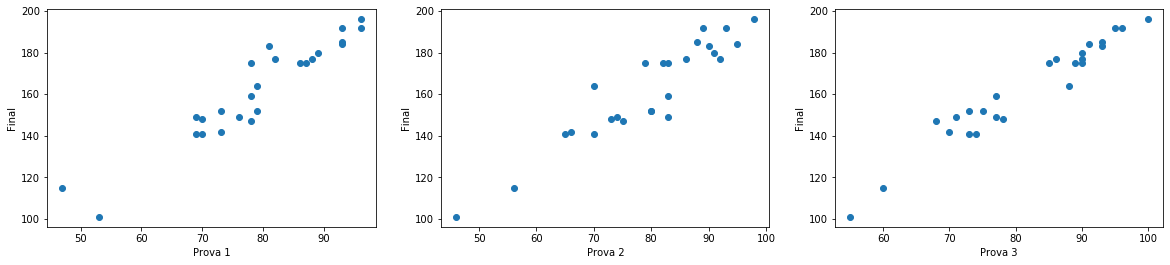

In [62]:
plt.figure(figsize=(20, 4))

plt.subplot(1, 3, 1)
plt.scatter(df.prova1.values, df.final.values)
plt.xlabel('Prova 1')
plt.ylabel('Final')

plt.subplot(1, 3, 2)
plt.scatter(df.prova2.values, df.final.values)
plt.xlabel('Prova 2')
plt.ylabel('Final')

plt.subplot(1, 3, 3)
plt.scatter(df.prova3.values, df.final.values)
plt.xlabel('Prova 3')
plt.ylabel('Final')

In [63]:
x = df[['prova1', 'prova2', 'prova3']].values
y = df['final'].values

print(x.shape, y.shape)

(25, 3) (25,)


In [64]:
minmax = MinMaxScaler(feature_range=(-1,1))
x = minmax.fit_transform(x.astype(np.float64))

In [65]:
reg = LinearRegression()
reg.fit(x, y)

print('w: ', reg.coef_)
print('b: ', reg.intercept_)

w:  [ 8.72048636 14.1054877  26.26749487]
b:  150.65175754349872


### Python

In [66]:
D = x.shape[1]
w = [2*random() - 1 for i in range(D)]
b = 2*random() - 1

learning_rate = 1e-2 # <- tente estimar a learning_rate

for step in range(400): # <- tente estimar o número de passos
    cost = 0
    for x_n, y_n in zip(x, y):
        y_pred = sum([x_i*w_i for x_i, w_i in zip(x_n, w)]) + b
        error = y_n - y_pred
        w = [w_i + learning_rate*error*x_i for x_i, w_i in zip(x_n, w)]
        b = b + learning_rate*error
        cost += error**2
        
    if step%200 == 0:
        print('step {0}: {1}'.format(step, cost))

print('w: ', w)
print('b: ', b)

step 0: 504733.7603930041
step 200: 174.19054245502934
w:  [10.355733284024536, 13.515851950733607, 25.307046881359252]
b:  150.56559624668517


### Numpy

In [72]:
D = x.shape[1]
w = 2*np.random.random(size=D)-1
b = 2*np.random.random()-1       

learning_rate = 1e-2 # <- tente estimar a learning_rate

for step in range(1): # <- tente estimar o número de passos
    cost = 0
    for x_n, y_n in zip(x, y):
        y_pred = np.dot(x_n, w) + b 
        error = y_n - y_pred
        w = w + learning_rate*np.dot(error, x_n)
        b = b + learning_rate*error
        cost += error**2
    
    if step%200 == 0:
        print('step {0}: {1}'.format(step, cost))
    
print('w: ', w)
print('b: ', b)

step 0: 504120.67071193823
w:  [13.29835256 11.26389136  7.33468926]
b:  35.080857502108096


# Referências

- [Artigo original do Perceptron](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.335.3398&rep=rep1&type=pdf)